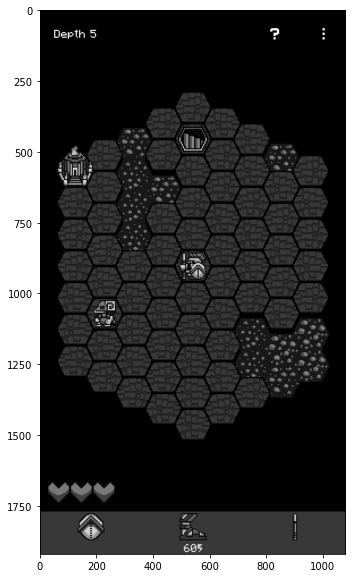

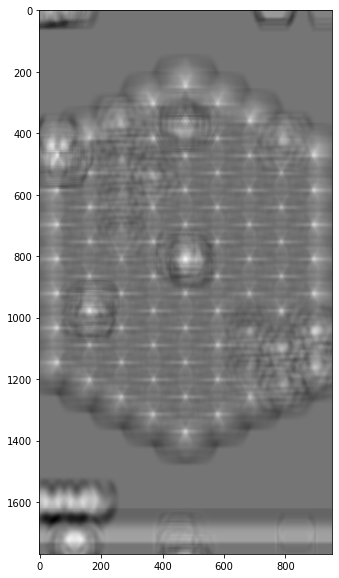

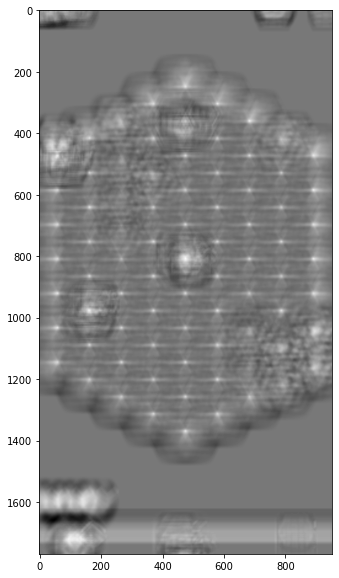

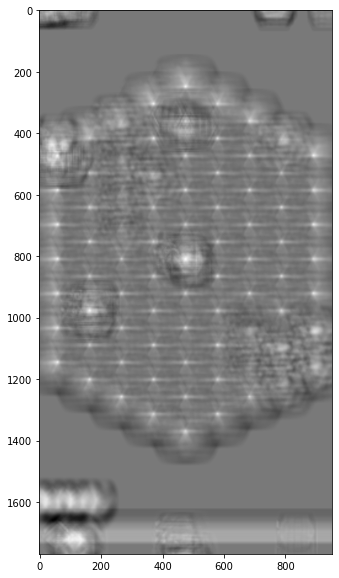

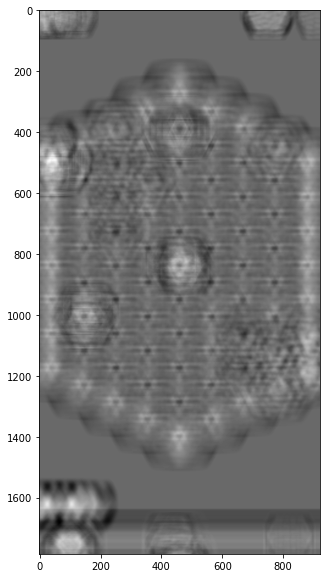

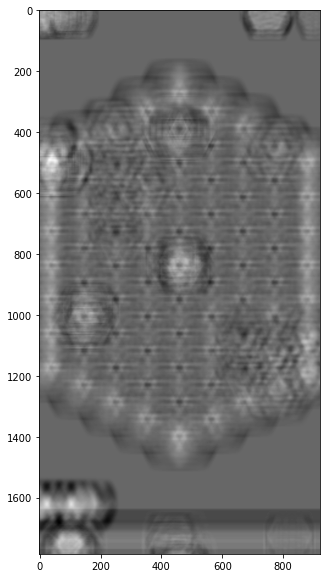

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import utils
import matplotlib

matplotlib.rcParams['figure.figsize'] = (15,10)


templates_path = [
    "assets/tile_base.png",
    "assets/tile_floor.1.png",
    "assets/tile_floor.2.png",
    "assets/tile_floor_large.1.png",
    "assets/tile_floor_large.2.png",
]


def scale_image(scale):
    def f(img):
        width = int(img.shape[1] * scale / 100)
        height = int(img.shape[0] * scale / 100)
        dim = (width, height)
        return cv.resize(img, dim, interpolation=cv.INTER_AREA)
    return f

templates = map(lambda x: cv.imread(x, 0), templates_path)
scaled_templates = map(scale_image(400), templates)
base = cv.imread('screens/1080x1920/simple1.png')
img_gray = cv.cvtColor(base, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.show()

matched_templates = map(lambda template: cv.matchTemplate(
        img_gray, template, cv.TM_CCOEFF, mask=template), scaled_templates)

for matched in matched_templates:
    plt.imshow(matched, cmap='gray')
    plt.show()
        # utils.show_image(res)

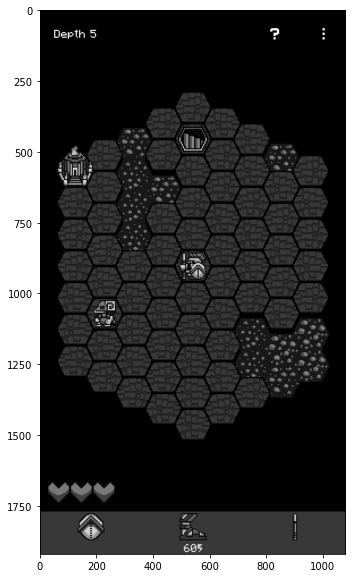

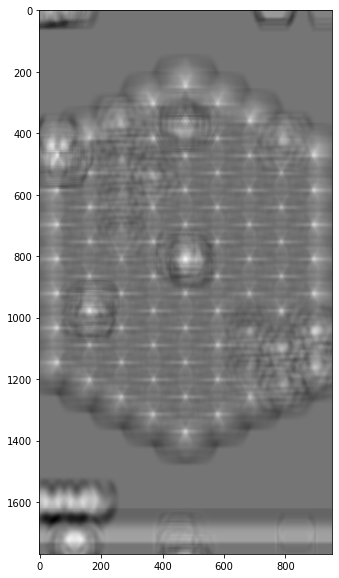

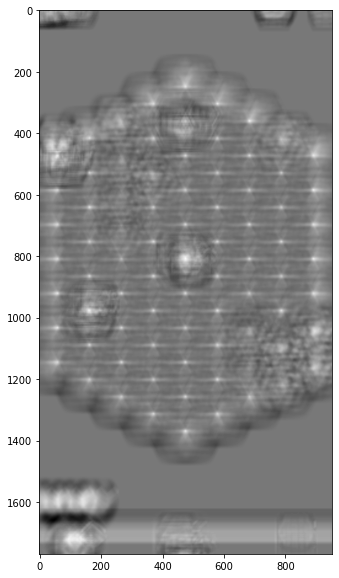

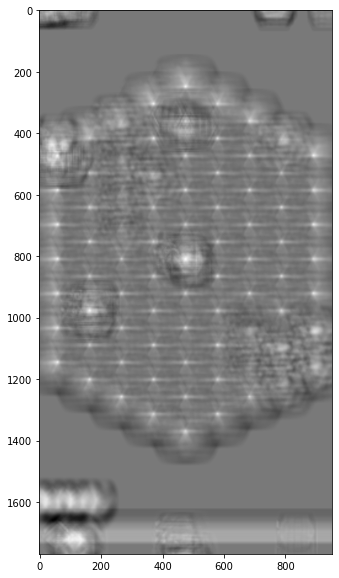

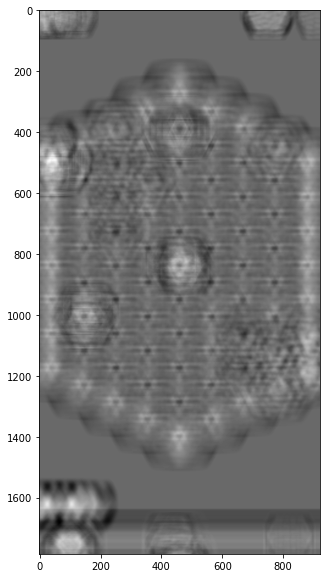

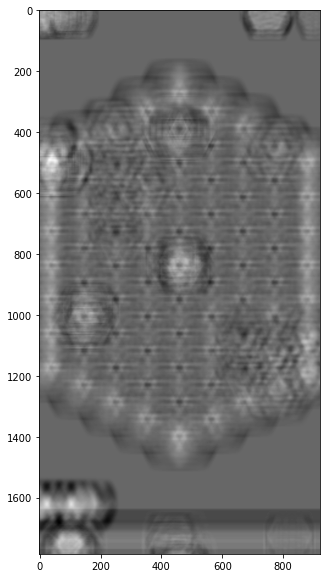

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import utils
import matplotlib

matplotlib.rcParams['figure.figsize'] = (15,10)


templates_path = [
    "assets/tile_base.png",
    "assets/tile_floor.1.png",
    "assets/tile_floor.2.png",
    "assets/tile_floor_large.1.png",
    "assets/tile_floor_large.2.png",
]


def scale_image(scale):
    def f(img):
        width = int(img.shape[1] * scale / 100)
        height = int(img.shape[0] * scale / 100)
        dim = (width, height)
        return cv.resize(img, dim, interpolation=cv.INTER_AREA)
    return f

templates = map(lambda x: cv.imread(x, 0), templates_path)
scaled_templates = map(scale_image(400), templates)
base = cv.imread('screens/1080x1920/simple1.png')
img_gray = cv.cvtColor(base, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.show()

matched_templates = map(lambda template: cv.matchTemplate(
        img_gray, template, cv.TM_CCOEFF, mask=template), scaled_templates)

for matched in matched_templates:
    plt.imshow(matched, cmap='gray')
    plt.show()
        # utils.show_image(res)

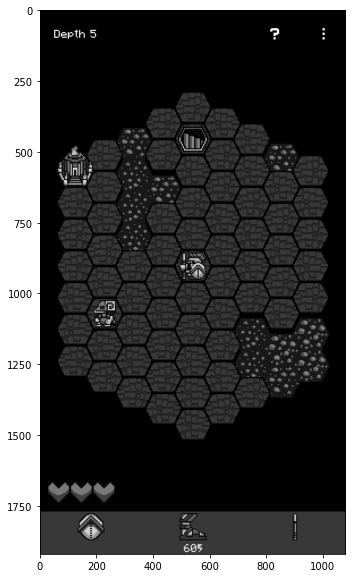

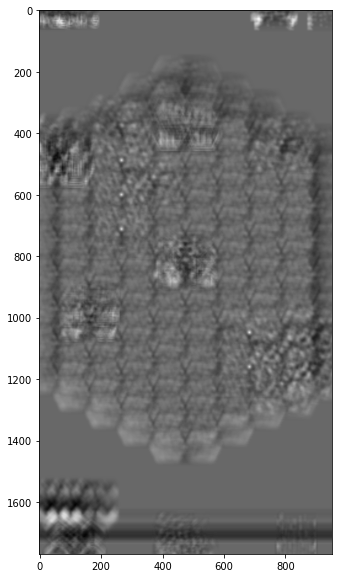

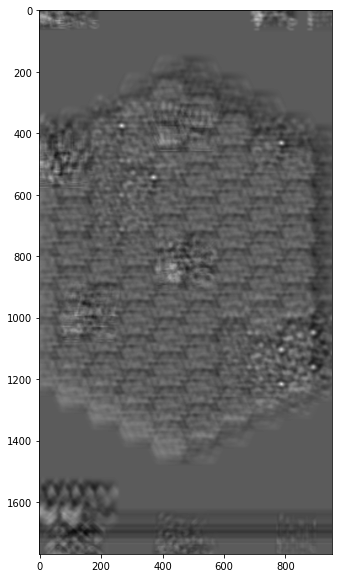

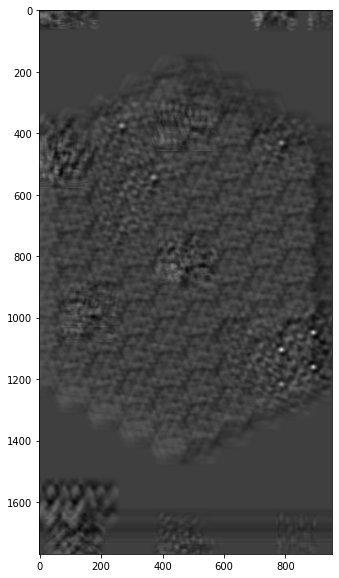

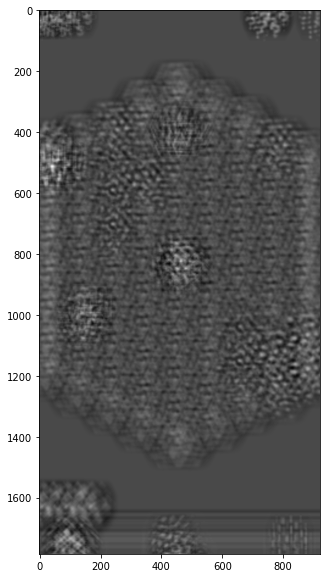

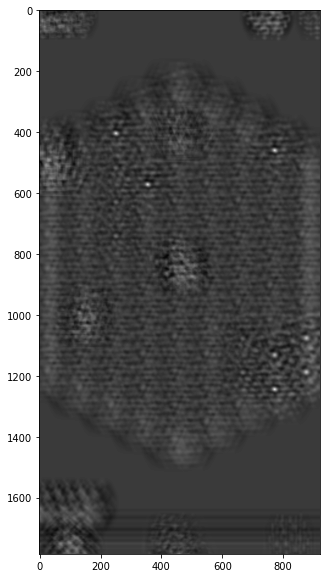

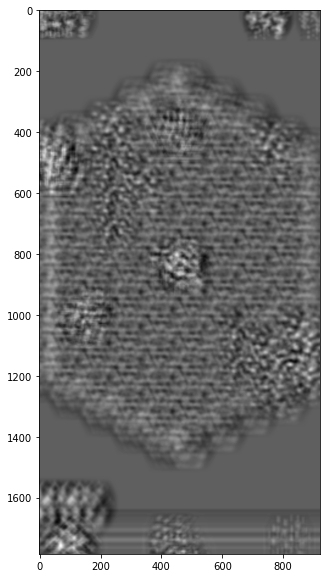

In [3]:
templates_path = [
    "assets/tile_liquid.1.png",
    "assets/tile_liquid.2.png",
    "assets/tile_liquid.3.png",
    "assets/tile_liquid_large.1.png",
    "assets/tile_liquid_large.2.png",
    "assets/tile_liquid_large.3.png",
]
templates = map(lambda x: cv.imread(x, 0), templates_path)
scaled_templates = map(scale_image(400), templates)
base = cv.imread('screens/1080x1920/simple1.png')
img_gray = cv.cvtColor(base, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.show()

matched_templates = map(lambda template: cv.matchTemplate(
        img_gray, template, cv.TM_CCOEFF, mask=template), scaled_templates)

for matched in matched_templates:
    plt.imshow(matched, cmap='gray')
    plt.show()
        # utils.show_image(res)

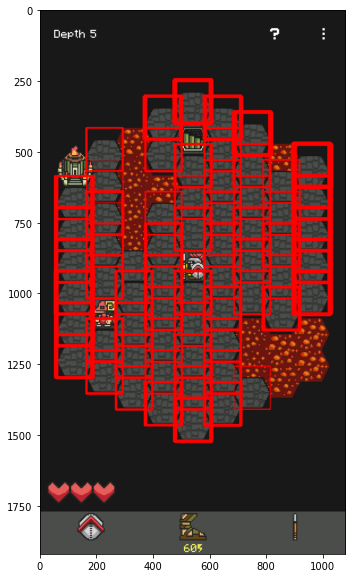

In [4]:
templates_path = [
    "assets/tile_floor.1.png",]
templates = list(map(lambda x: cv.imread(x), templates_path))
scaled_templates = list(map(scale_image(400), templates))
base = cv.imread('screens/1080x1920/simple1.png')
# img_gray = cv.cvtColor(base, cv.COLOR_BGR2GRAY)
def split_by_colour(img):
    return img[:,:,0],img[:,:,1],img[:,:,2]
r,g,b =split_by_colour(base)
methods = [cv.TM_CCOEFF_NORMED]
methods_names = ["cv.TM_CCOEFF_NORMED"]
for template in scaled_templates:
    for templates_split_by_color in map(split_by_colour, scaled_templates):
        result_color = None
        for color,base_color,template_color in zip(("red","green","blue"),(r,g,b),templates_split_by_color):
            w, h = template_color.shape[::-1]
            for name,method in zip(methods_names,methods):
                res = cv.matchTemplate(
                    base_color, template_color, method, mask=template_color)
                if result_color is not None:
                    result_color += res
                else:
                    result_color = res
        result_color/=3
        threshold = 0.5
        loc = np.where( result_color >= threshold)
        for pt in zip(*loc[::-1]):
            base = cv.rectangle(base, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
        utils.show_image(base)
            # utils.show_image(res)

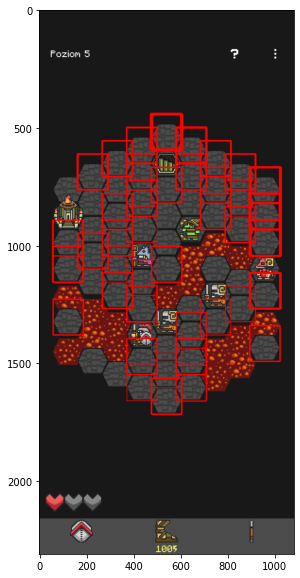

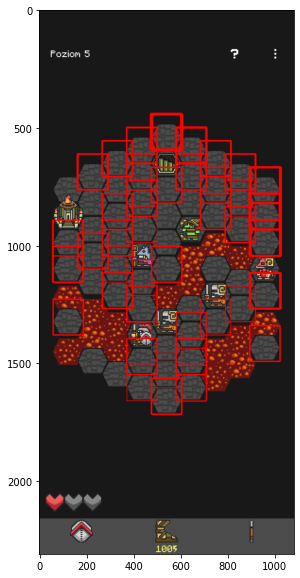

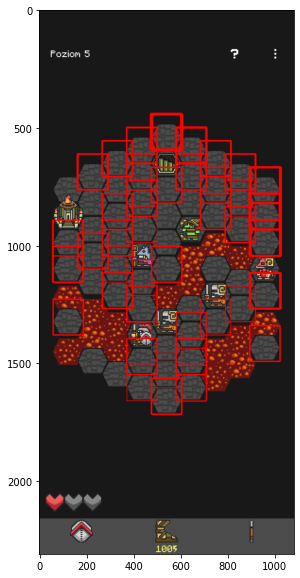

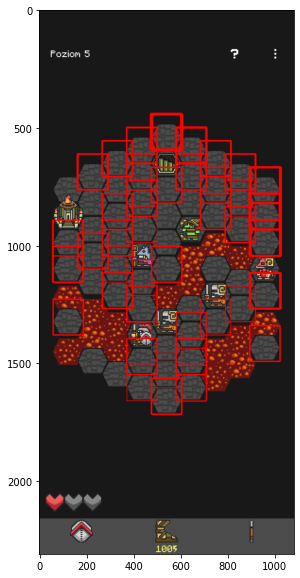

In [5]:
templates_path = [
    "assets/tile_floor.1.png",
    "assets/tile_floor.2.png",
    "assets/tile_floor_large.1.png",
    "assets/tile_floor_large.2.png",
]
templates = list(map(lambda x: cv.imread(x), templates_path))
scaled_templates = list(map(scale_image(400), templates))
base = cv.imread('screens/1080x2310/Screenshot_20220118_220812_com.magmafortress.hoplite.jpg')
# img_gray = cv.cvtColor(base, cv.COLOR_BGR2GRAY)
def split_by_colour(img):
    return img[:,:,0],img[:,:,1],img[:,:,2]
r,g,b =split_by_colour(base)
methods = [cv.TM_CCOEFF_NORMED]
methods_names = ["cv.TM_CCOEFF_NORMED"]
for templates_split_by_color in map(split_by_colour, scaled_templates):
    result_color = None
    for color,base_color,template_color in zip(("red","green","blue"),(r,g,b),templates_split_by_color):
        w, h = template_color.shape[::-1]
        for name,method in zip(methods_names,methods):
            res = cv.matchTemplate(
                base_color, template_color, method, mask=template_color)
            if result_color is not None:
                result_color += res
            else:
                result_color = res
    result_color/=3
    threshold = 0.6
    loc = np.where( result_color >= threshold)
    for pt in zip(*loc[::-1]):
        base = cv.rectangle(base, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    utils.show_image(base)
        # utils.show_image(res)

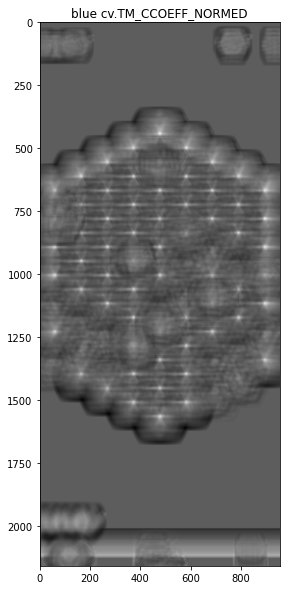

In [6]:
templates_path = [
    "assets/tile_floor.1.png",]
templates = list(map(lambda x: cv.imread(x), templates_path))
scaled_templates = list(map(scale_image(400), templates))
base = cv.imread('screens/1080x2310/Screenshot_20220118_220812_com.magmafortress.hoplite.jpg')
# img_gray = cv.cvtColor(base, cv.COLOR_BGR2GRAY)
def split_by_colour(img):
    return img[:,:,0],img[:,:,1],img[:,:,2]
r,g,b =split_by_colour(base)
methods = [cv.TM_CCOEFF_NORMED]
methods_names = ["cv.TM_CCOEFF_NORMED"]
for template in scaled_templates:
    for templates_split_by_color in map(split_by_colour, scaled_templates):
        result_color = None
        for color,base_color,template_color in zip(("red","green","blue"),(r,g,b),templates_split_by_color):
            for name,method in zip(methods_names,methods):
                res = cv.matchTemplate(
                    base_color, template_color, method, mask=template_color)
                if result_color is not None:
                    result_color += res
                else:
                    result_color = res
        plt.imshow(result_color/3, cmap='gray')
        plt.title(f"{color} {name}")
        plt.show()
            # utils.show_image(res)

In [7]:
sharp1 = np.array([[-1,-1,-1], 
                       [-1, 9,-1],
                       [-1,-1,-1]])/9
sharp2 = np.array([
    [-1,-1,-1,-1,-1],
    [-1,-1,-1,-1,-1],
    [-1,-1,25,-1,-1],
    [-1,-1,-1,-1,-1],
    [-1,-1,-1,-1,-1]
])/25
sharp2 = np.array([
    [-1,-1,-1,-1,-1],
    [-1,-1,-1,-1,-1],
    [-1,-1,25,-1,-1],
    [-1,-1,-1,-1,-1],
    [-1,-1,-1,-1,-1]
])

sharp3 = np.array([
    [-1,-2,-4,-2,-1],
    [-2,-4,-8,-4,-2],
    [-4,-8,85,-8,-4],
    [-2,-4,-8,-4,-2],
    [-1,-2,-4,-2,-1]
])/85
sharp4 = np.array([
    [1,4,6,4,1],
    [4,16,24,16,4],
    [6,24,-476,24,6],
    [4,16,24,16,4],
    [1,-2,6,-2,1]
])/-256
sharp5 = np.array([
    [-1,-1,-1,-1,-1],
    [-1,1,2,1,-1],
    [-1,2,4,2,-1],
    [-1,1,2,1,-1],
    [-1,-1,-1,-1,-1]
])

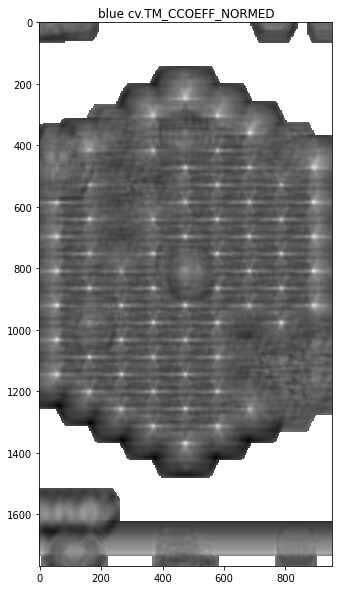

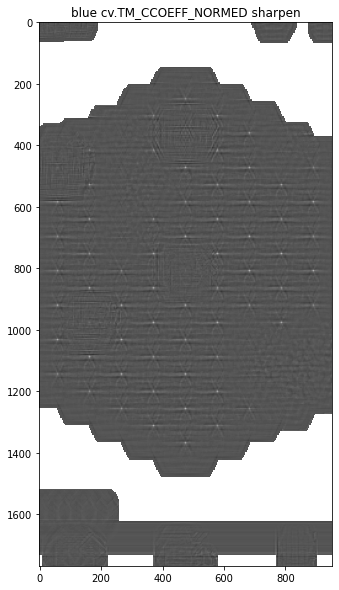

In [8]:
templates_path = [
    "assets/tile_floor.1.png",]
templates = list(map(lambda x: cv.imread(x), templates_path))
scaled_templates = list(map(scale_image(400), templates))
base = cv.imread('screens/1080x1920/simple1.png')
# img_gray = cv.cvtColor(base, cv.COLOR_BGR2GRAY)
def split_by_colour(img):
    return img[:,:,0],img[:,:,1],img[:,:,2]
r,g,b =split_by_colour(base)
methods = [cv.TM_CCOEFF_NORMED]
methods_names = ["cv.TM_CCOEFF_NORMED"]
for template in scaled_templates:
    for templates_split_by_color in map(split_by_colour, scaled_templates):
        result_color = None
        for color,base_color,template_color in zip(("red","green","blue"),(r,g,b),templates_split_by_color):
            for name,method in zip(methods_names,methods):
                res = cv.matchTemplate(
                    base_color, template_color, method, mask=template_color)
                if result_color is not None:
                    result_color += res
                else:
                    result_color = res
        result_color/=3
        plt.imshow(result_color, cmap='gray')
        plt.title(f"{color} {name}")
        plt.show()
        sharpen_img = cv.filter2D(result_color, -1, sharp5)
        plt.imshow(sharpen_img, cmap='gray')
        plt.title(f"{color} {name} sharpen")
        plt.show()
            # utils.show_image(res)

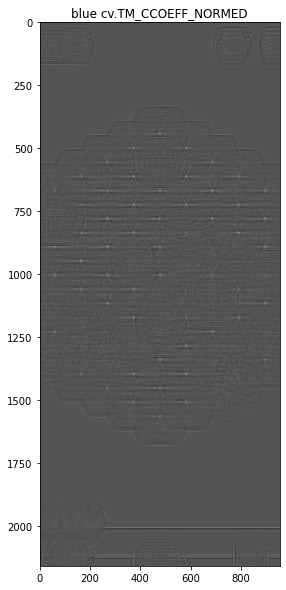

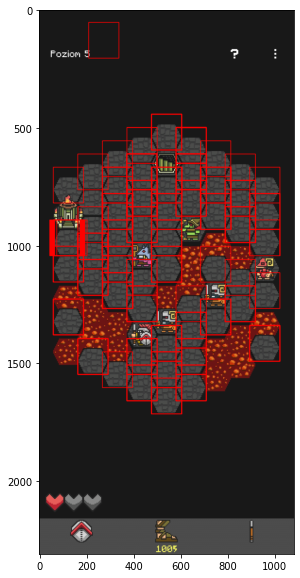

In [9]:
templates_path = [
    "assets/tile_floor.1.png",
]
templates = list(map(lambda x: cv.imread(x), templates_path))
scaled_templates = list(map(scale_image(400), templates))
base = cv.imread('screens/1080x2310/Screenshot_20220118_220812_com.magmafortress.hoplite.jpg')
# img_gray = cv.cvtColor(base, cv.COLOR_BGR2GRAY)
def split_by_colour(img):
    return img[:,:,0],img[:,:,1],img[:,:,2]
r,g,b =split_by_colour(base)
methods = [cv.TM_CCOEFF_NORMED]
methods_names = ["cv.TM_CCOEFF_NORMED"]
for templates_split_by_color in map(split_by_colour, scaled_templates):
    result_color = None
    for color,base_color,template_color in zip(("red","green","blue"),(r,g,b),templates_split_by_color):
        w, h = template_color.shape[::-1]
        for name,method in zip(methods_names,methods):
            res = cv.matchTemplate(
                base_color, template_color, method, mask=template_color)
            if result_color is not None:
                result_color += res
            else:
                result_color = res
    result_color/=3
    sharpen_img = cv.filter2D(result_color, -1, sharp5)
    plt.imshow(sharpen_img, cmap='gray')
    plt.title(f"{color} {name}")
    plt.show()
    threshold = 0.8
    loc = np.where( sharpen_img >= threshold)
    for pt in zip(*loc[::-1]):
        base = cv.rectangle(base, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    utils.show_image(base)
        # utils.show_image(res)